In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

[2.201717302637538, 1.6870130955802751]
-0.9999999867750298
861


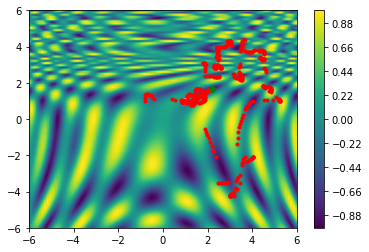

In [2]:
from numpy.core.fromnumeric import resize
func = lambda th: np.sin(1/2 * th[0]**2 - 1/4 * th[1] ** 2 +3) * np.cos(2*th[0]+1-np.e**th[1])

#Representamos la funcion
_x =np.linspace(-6,6, 100)
_y =np.linspace(-6,6, 100)
_z=np.zeros((100,100))
for ix, x in enumerate(_x):
  for iy, y in enumerate(_y):
    _z[iy,ix]=func([x,y])

plt.contourf(_x,_y,_z,100)
plt.colorbar()

#Algorimo AdaMax

Theta = [1,1]
Thetaold=[0,0]
lr=0.1
b1= 0.9
b2=0.999
k=1
E=10**(-8)
plt.plot(Theta[0],Theta[1], "o", c = "white")
grad=np.zeros(2)
m=[0,0]
v=[0,0]
vv=np.zeros(2)
U=np.zeros(2)
M=np.zeros(2)
contador= 0
diferencia=1

for _ in range(10000):

  if diferencia < 10**-5:
    break
  else:
    grad[0] = -2*np.sin(2*Theta[0]+1-np.e**Theta[1])*np.sin(1/2*Theta[0]**2 -1/4* Theta[1]**2+3) + Theta[0]*np.cos(2*Theta[0]+1-np.e**Theta[1])*np.cos(1/2*Theta[0]**2-1/4*Theta[1]**2+3)
    grad[1]= np.e**Theta[1]*np.sin(2*Theta[0]+1-np.e**Theta[1])*np.sin(1/2*Theta[0]**2-1/4*Theta[1]**2+3)-1/2*Theta[1]*np.cos(2*Theta[0]+1-np.e**Theta[1])*np.cos(1/2*Theta[0]**2 -1/4*Theta[1]**2+3)
   #print(grad)
    for it, th in enumerate(Theta):
        vv[it]=v[it]
        m[it]= b1*m[it] + (1-b1)* grad[it]
        v[it]= b2*v[it] + (1-b2)* grad[it]**2
    
    b1k= b1**(k)
    b2k= b2**(k)
    k=k+1

    for it, th in enumerate(Theta):

      M[it]= m[it]/(1-b1k)
    
      if b2*vv[0] < abs(grad[0]):
        U[it]=abs(grad[it])
      else:
        U[it]=b2*vv[it]
    
    for it, th in enumerate(Theta):  

      Thetaold[it]=Theta[it]
      Theta[it] = Theta[it] - lr * M[it]/ U[it]
    plt.plot(Theta[0],Theta[1], ".", c = "red")

    diferencia=np.sqrt((Thetaold[0]-Theta[0])**2+(Thetaold[1]-Theta[1])**2)
      #print(diferencia)
    contador=contador+1

print(Theta)
print(func(Theta))
print(contador)
plt.plot(Theta[0],Theta[1], "o", c = "green")

plt.show()